# EE 120, Spring 2017
# Python Homework 1

In this assignment, we will investigate a simple system and determine its properties.

## System Identification

After receiving yet another crime alert from UCPD, you decide to fulfill your childhood dream of becoming Batman. You check out a local cave to build your lair. Inside the cave, you trip and accidentally drop your phone on a rock, which makes a loud bang sound. About 0.2 seconds later, you hear another bang, which is about half as loud. About 0.4 seconds after you dropped your phone, you hear another bang, which is half as loud as the echo. Amazed by the echoes, you clap twice 2 seconds after you dropped your phone to investigate the acoustics of your soon-to-be office for crime fighting. Your second clap comes 0.2 seconds after the first clap. Clapping twice, you hear the two claps themselves in additon to the two echoes of the first clap (each clap about 0.2 seconds apart) and the two echoes of the second clap (with the same effect). The cave does not seem to amplify or attenuate the two initial claps.

### Question 1:

We would like to model the acoustics of the cave as a system. Let one time unit be equivalent to 0.1 second. Is the system (a) <b>linear</b> and is the system (b) <b>time invariant</b>? (c) If the system is <b>Linear and Time Invariant (LTI)</b>, what is the <b>impulse response</b> of the system?

(a) Linear. $$y[n] = x[n] + \frac{1}{2}x[n-2] + ...$$
(b) Time Invariant. 
    Reason: The clap at t=2 has the same response as the clap at t=0
<br>(c) The impulse response of hte LTI system is  
   $$h[n] = \tau[n] + \frac{1}{2}\tau[n-2] + ...$$

The function <i>cave</i> defined below models the cave acoustics system described above. We also provide you with a plotting function.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def cave(x):
    y = np.convolve([1, 0, 0.5, 0, 0.25], x)
    return y

def plot(x):
    plt.figure()
    plt.stem(x)
    plt.xlabel(r'$n \times 0.1$ seconds')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((-0.2, len(x)-0.8, y1-0.1, y2+0.1))
    plt.show()


### Question 2:

(a) Using the function <i>plot</i> given to you, plot the impulse response of the system. (b) Now, using the function <i>cave</i>, input a signal that will yield the system's impulse response. A one-dimensional discrete-time signal can be represented as an array of numbers in a computer program. Plot this impulse response and verify that it is equivalent to the impulse response you plotted in (a).

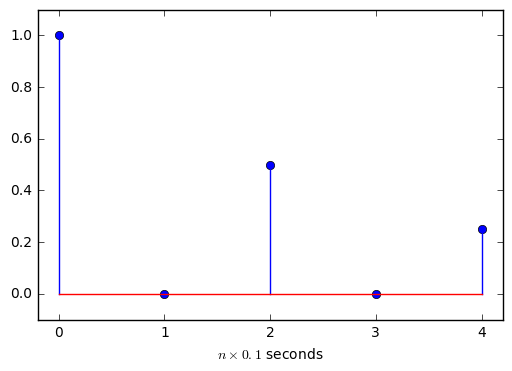

In [5]:
# WRITE YOUR ANSWER HERE
impulse_response = [1, 0, 0.5, 0, 0.25]
plot(impulse_response)

### Question 3:

Is the system (a) <b>causal</b> and is the system (b) <b>Bounded-Input-Bounded-Output (BIBO) stable</b>?

(a) The system is causal, because the current signal only depends on inputs from the past. <br>
(b) The system is BIBO stable. Given that the loundness gets decreased over time, a bounded input will definitely result in a bounded output. 

## LTI System Verification

Let the moment you dropped your phone be time $n = 0$ and let the bang noise have magnitude 1. Your clap sound has magnitude 0.5. The noises you have been making in the cave woke up an insomniac super-bat that moves noiselessly. The angry super-bat bites you and you shout in pain. The shout came about 4 seconds after you dropped your phone. Your shout can be modeled as a constant signal that lasts 0.3 second with magnitude 2.

### Question 4:
Plot all sounds (output of the system) that were heard inside the cave from time $n = 0$ using the above two functions: <i>cave</i> and <i>plot</i> given to you.

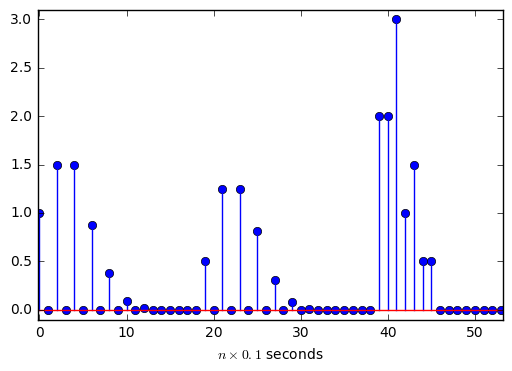

In [18]:
from operator import add
# WRITE YOUR ANSWER HERE
# Bang
bang = [1, 0, 0, 0, 0]
bang += [0]*50
# Clap1 
clap1 = [0]*50
clap1[19] = 0.5
# Clap2
clap2 = [0]*50
clap2[21] = 0.5
# Shout
shout = [0]*50
shout[39] = 2
shout[40] = 2
shout[41] = 2

result = [sum(x) for x in zip(cave(bang), cave(clap1))]
result = [sum(x) for x in zip(cave(result), cave(clap2))]
result = [sum(x) for x in zip(cave(result), cave(shout))]

plot(result)


